In [5]:
import tensorflow as tf
# Check if GPU is available and if CUDA is detected
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
## read the data
import scipy.io
data = scipy.io.loadmat('/Users/jinyanwei/Desktop/BP_Model/Data/Cuffless_BP_Estimation/part_1.mat')

In [4]:
fs = 125
patient = 4
patient_data = data['p'][0,patient][:,:3000]
ppg_ori = patient_data[0]
bp_ori = patient_data[1]
ecg_ori = patient_data[2]
#ecg_detrened = straighten_ecg(ecg_ori)
ppg_normalized = (ppg_ori-min(ppg_ori)) / (max(ppg_ori)-min(ppg_ori))
bp_normalized = (bp_ori-min(bp_ori)) / (max(bp_ori)-min(bp_ori))
ecg_normalized = (ecg_ori-min(ecg_ori)) / (max(ecg_ori)-min(ecg_ori))

43 ppg max index: [14, 86, 130, 163, 233, 303, 374, 445, 514, 583, 723, 793, 862, 932, 1001, 1071, 1140, 1211, 1282, 1352, 1422, 1491, 1562, 1634, 1706, 1775, 1846, 1917, 1988, 2056, 2127, 2196, 2266, 2334, 2404, 2473, 2543, 2611, 2681, 2750, 2819, 2888, 2956], 
42 ppg min index: [69, 112, 147, 216, 287, 358, 428, 498, 567, 637, 775, 845, 915, 984, 1054, 1124, 1194, 1264, 1335, 1405, 1474, 1545, 1616, 1689, 1759, 1830, 1900, 1970, 2040, 2110, 2180, 2249, 2318, 2387, 2457, 2526, 2595, 2664, 2733, 2803, 2869, 2940]
42 ppg max slope: [77, 128, 153, 224, 294, 365, 435, 506, 574, 712, 783, 851, 922, 992, 1061, 1132, 1200, 1272, 1343, 1412, 1482, 1553, 1624, 1696, 1766, 1836, 1907, 1978, 2047, 2117, 2185, 2256, 2326, 2394, 2464, 2533, 2602, 2671, 2740, 2809, 2878, 2946]


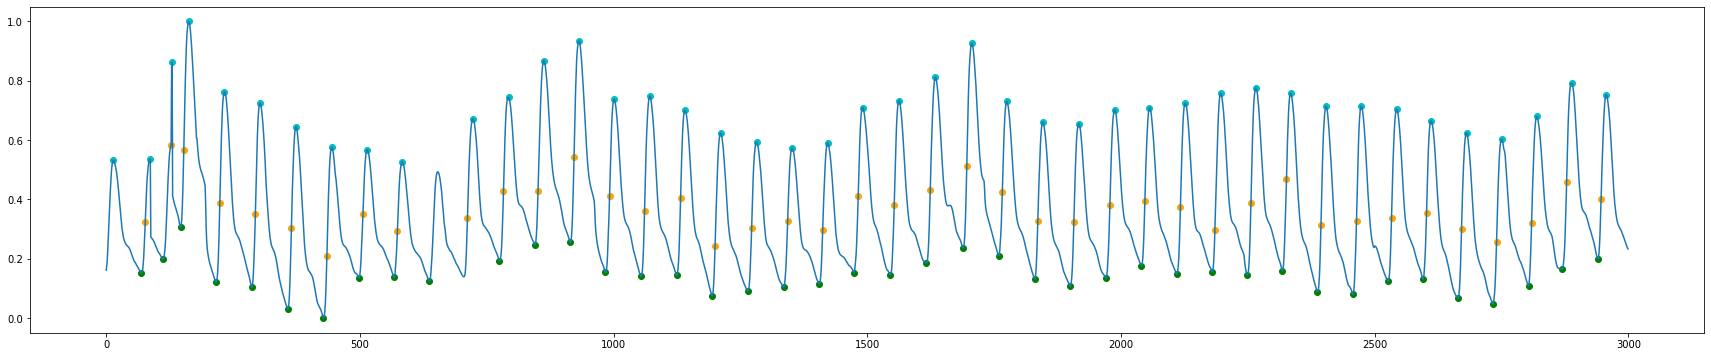

In [13]:
#def get_ppg_points_index(ppg_signal):
import numpy as np
import matplotlib.pyplot as plt
ppg_signal = ppg_normalized
ppg_min_index = []
ppg_max_index = []
ppg_height= (0.5 * (np.max(ppg_signal) - np.min(ppg_signal))) + np.min(ppg_signal)
for i in range(1, (len(ppg_signal)-1)):
    if (ppg_signal[i] > ppg_signal[i-1]) and (ppg_signal[i] >= ppg_signal[i+1]) and (ppg_signal[i] > ppg_height) :
        ppg_max_index.append(i)
for i in range(len(ppg_max_index[:-1])):
    ppg_min_index.append(ppg_max_index[i] + np.argmin(ppg_signal[ppg_max_index[i]:ppg_max_index[i+1]]))
print(f'{len(ppg_max_index)} ppg max index: {ppg_max_index}, \n{len(ppg_min_index)} ppg min index: {ppg_min_index}')

ppg_max_slopes_index = []
for i in range(len(ppg_min_index)):  
    ppg_segement = ppg_signal[ppg_min_index[i]:ppg_max_index[i+1]]
    ppg_slope_list = []
    for point in range(len(ppg_segement)-1):
        ppg_slope_list.append(ppg_segement[point+1]-ppg_segement[point])
    #print(i)
    #print(ppg_slope_list)
    ppg_max_slope = max(ppg_slope_list)
    ppg_max_slope_index_in_segement = ppg_slope_list.index(ppg_max_slope)
    ppg_max_slope_index = ppg_min_index[i] + ppg_max_slope_index_in_segement
    ppg_max_slopes_index.append(ppg_max_slope_index)
print(f'{len(ppg_max_slopes_index)} ppg max slope: {ppg_max_slopes_index}')
fig = plt.figure(figsize=(30,6))
plt.scatter(ppg_max_slopes_index, ppg_signal[ppg_max_slopes_index], color='orange', marker='o')
plt.scatter(ppg_max_index, ppg_signal[ppg_max_index], color='c', marker='o')
plt.scatter(ppg_min_index, ppg_signal[ppg_min_index], color='green', marker='o')
plt.plot(ppg_signal)
plt.show()

44 sbp index: [52, 95, 131, 198, 268, 339, 410, 479, 549, 619, 688, 758, 827, 897, 967, 1037, 1106, 1176, 1247, 1318, 1388, 1457, 1528, 1599, 1671, 1741, 1811, 1882, 1952, 2021, 2092, 2161, 2230, 2299, 2369, 2438, 2508, 2576, 2645, 2715, 2784, 2851, 2921, 2991], 
43 dbp index: [75, 117, 186, 256, 326, 397, 467, 536, 606, 675, 746, 815, 884, 954, 1024, 1094, 1163, 1234, 1305, 1375, 1444, 1515, 1586, 1658, 1728, 1798, 1869, 1939, 2009, 2079, 2148, 2218, 2287, 2356, 2426, 2495, 2564, 2633, 2702, 2771, 2839, 2908, 2978]


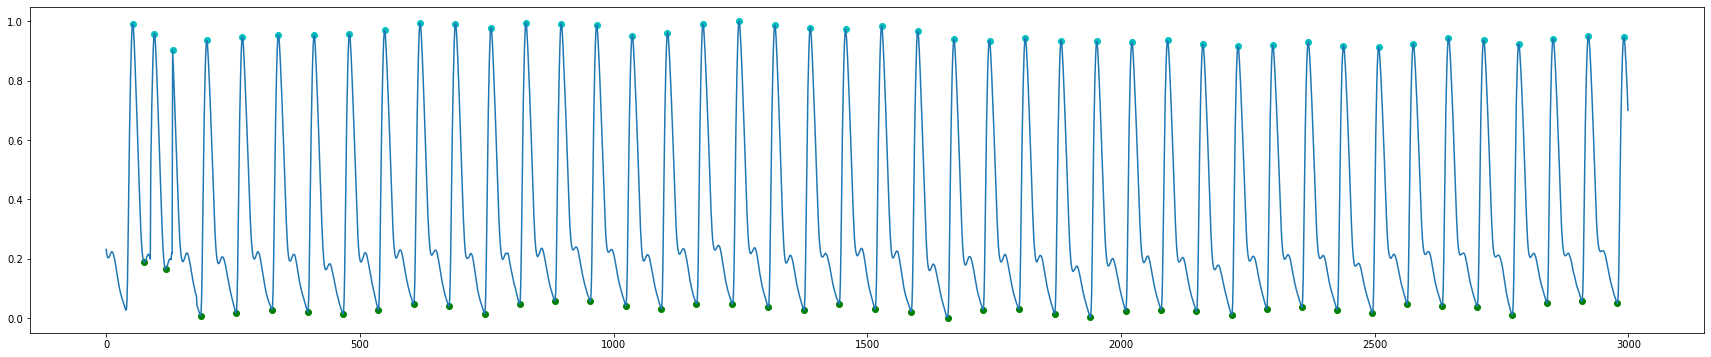

In [10]:
#def get_bp_points_index(bp_signal):
bp_signal = bp_normalized
sbp_height = np.min(bp_signal) + 0.6 * (np.max(bp_signal) - np.min(bp_signal))
sbp_index = []
for i in range(1, (len(bp_signal)-1)):
    if (bp_signal[i] > bp_signal[i-1]) and (bp_signal[i] >= bp_signal[i+1]) and (bp_signal[i] > sbp_height):
        sbp_index.append(i)

dbp_index = []
for index_one, index_two in zip(sbp_index[:-1], sbp_index[1:]):
    dbp_index.append(np.argmin(bp_signal[index_one:index_two]) + index_one)

print(f'{len(sbp_index)} sbp index: {sbp_index}, \n{len(dbp_index)} dbp index: {dbp_index}')
fig = plt.figure(figsize=(30,6))
plt.scatter(sbp_index, bp_signal[sbp_index], color='c', marker='o')
plt.scatter(dbp_index, bp_signal[dbp_index], color='green', marker='o')
plt.plot(bp_signal)
plt.show()

0.6
71 r peak index: [232, 290, 303, 319, 341, 360, 373, 442, 512, 582, 599, 621, 625, 639, 651, 721, 790, 860, 903, 917, 930, 935, 1000, 1043, 1047, 1057, 1069, 1075, 1079, 1139, 1198, 1210, 1229, 1251, 1254, 1268, 1277, 1281, 1322, 1325, 1329, 1339, 1344, 1350, 1420, 1491, 1549, 1562, 1633, 1703, 1774, 1832, 1845, 1915, 1985, 2055, 2112, 2124, 2194, 2262, 2332, 2401, 2471, 2539, 2609, 2677, 2747, 2815, 2884, 2942, 2954]
70 ecg min index: [258, 299, 306, 329, 353, 369, 400, 470, 538, 585, 609, 621, 632, 647, 714, 724, 811, 863, 912, 926, 933, 959, 1003, 1044, 1048, 1066, 1073, 1076, 1097, 1166, 1207, 1214, 1239, 1251, 1260, 1274, 1277, 1307, 1322, 1326, 1329, 1343, 1344, 1417, 1423, 1495, 1559, 1589, 1661, 1730, 1801, 1841, 1872, 1942, 2011, 2082, 2121, 2152, 2220, 2289, 2359, 2429, 2498, 2566, 2635, 2704, 2773, 2841, 2887, 2950]
38 s peak index: [235, 295, 344, 377, 446, 515, 626, 655, 793, 906, 937, 1064, 1143, 1203, 1256, 1285, 1354, 1554, 1566, 1637, 1707, 1778, 1838, 1848, 1918, 

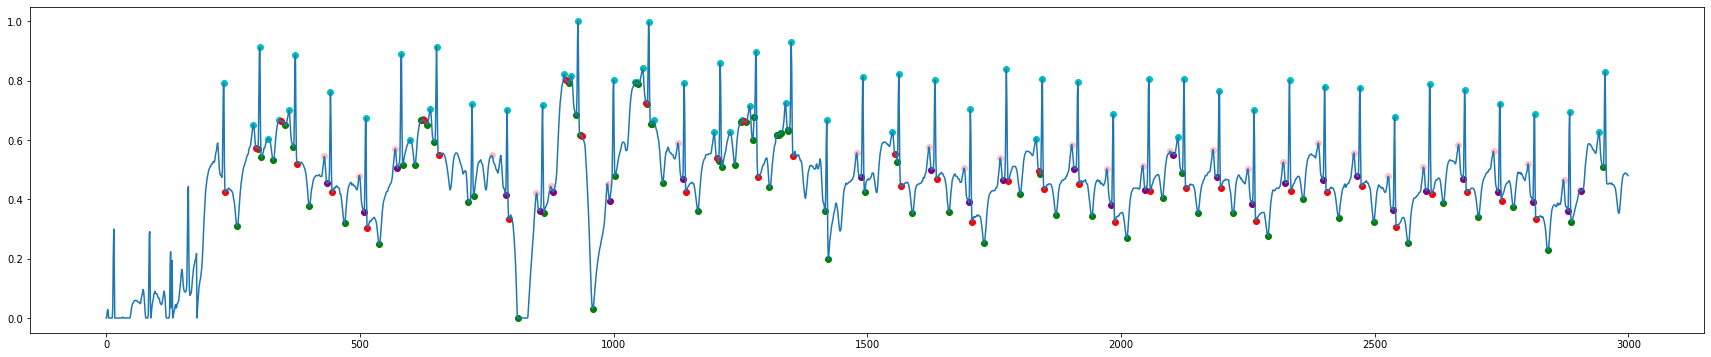

In [14]:
#def get_ecg_points_index(ecg_signal):
ecg_signal = ecg_normalized

ecg_r_height = min(ecg_signal) + ((max(ecg_signal) - min(ecg_signal)) * 0.6)
print(ecg_r_height)
r_peak_index = []
for i in range(1, (len(ecg_signal)-1)):
    if (ecg_signal[i] > ecg_signal[i-1]) and (ecg_signal[i] >= ecg_signal[i+1]) and (ecg_signal[i] >= ecg_r_height):
        r_peak_index.append(i)
print(f'{len(r_peak_index)} r peak index: {r_peak_index}')

ecg_min_index = []
for index0, index1 in zip(r_peak_index[:-1], r_peak_index[1:]):
    #print(f'index0: {index0}, index1: {index1}')
    ecg_min_index.append(index0 + np.argmin(ecg_signal[index0:index1]))
print(f'{len(ecg_min_index)} ecg min index: {ecg_min_index}')   

s_peak_index = []
for index0, index1 in zip(r_peak_index[:-1], ecg_min_index):
    ecg_second_half = ecg_signal[index0:index1]
    #s_peak_in_one_peak = []
    #s_peak_in_one_peak_index = []
    for i in range(1, len(ecg_second_half) - 1):
        if (ecg_second_half[i] < ecg_second_half[i - 1]) and (ecg_second_half[i] <= ecg_second_half[i + 1]):
            #s_peak_in_one_peak.append(ecg_second_half[i])
            #s_peak_in_one_peak_index.append(index0 + i)
            #s_peak_true = min(s_peak_in_one_peak)
            #s_peak_index.append(s_peak_in_one_peak_index[s_peak_in_one_peak.index(s_peak_true)])
            s_peak_index.append(index0 + i)
            break
print(f'{len(s_peak_index)} s peak index: {s_peak_index}')   

p_peak_index = []
for i in range(min(len(ecg_min_index),len(r_peak_index)) - 1):
    index_one = ecg_min_index[i]
    index_two = r_peak_index[i + 1]
    find_p_peak_list = []
    find_p_peak_index_list = []
    for i in range(index_one, index_two):
        if (ecg_signal[i] > ecg_signal[i - 1]) and (ecg_signal[i] > ecg_signal[i + 1]):
            find_p_peak_list.append(ecg_signal[i])
            find_p_peak_index_list.append(i)
    if len(find_p_peak_list) >= 1:
        p_peak_index.append(find_p_peak_index_list[find_p_peak_list.index(max(find_p_peak_list))])
print(f'{len(p_peak_index)} p peak index: {p_peak_index}')   

q_peak_index = []
r_loc = 0
for index_p in p_peak_index:
    for index_r in r_peak_index[r_loc:]:
        if index_r > index_p:
            q_peak_index.append(index_p + np.argmin(ecg_signal[index_p:index_r]))
            r_loc = r_peak_index.index(index_r)
            break
print(f'{len(q_peak_index)} q peak index: {q_peak_index}')

fig = plt.figure(figsize=(30,6))
plt.plot(ecg_signal)
plt.scatter(r_peak_index, ecg_signal[r_peak_index], color='c', marker='o')
plt.scatter(ecg_min_index, ecg_signal[ecg_min_index], color='green', marker='o')
plt.scatter(s_peak_index, ecg_signal[s_peak_index], color='red', marker='o')
plt.scatter(p_peak_index, ecg_signal[p_peak_index], color='pink', marker='o')
plt.scatter(q_peak_index, ecg_signal[q_peak_index], color='purple', marker='o')
plt.show()

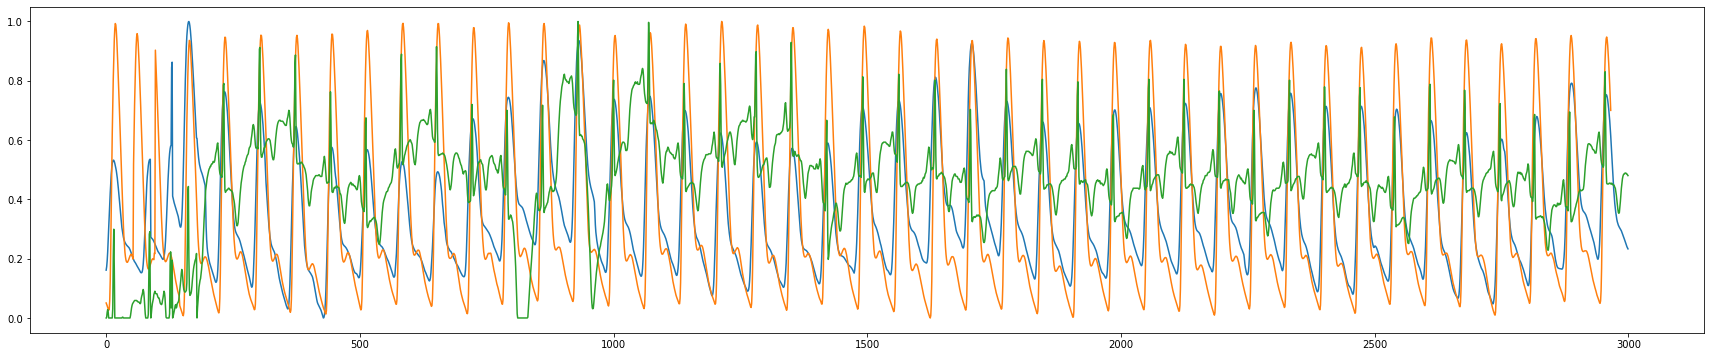

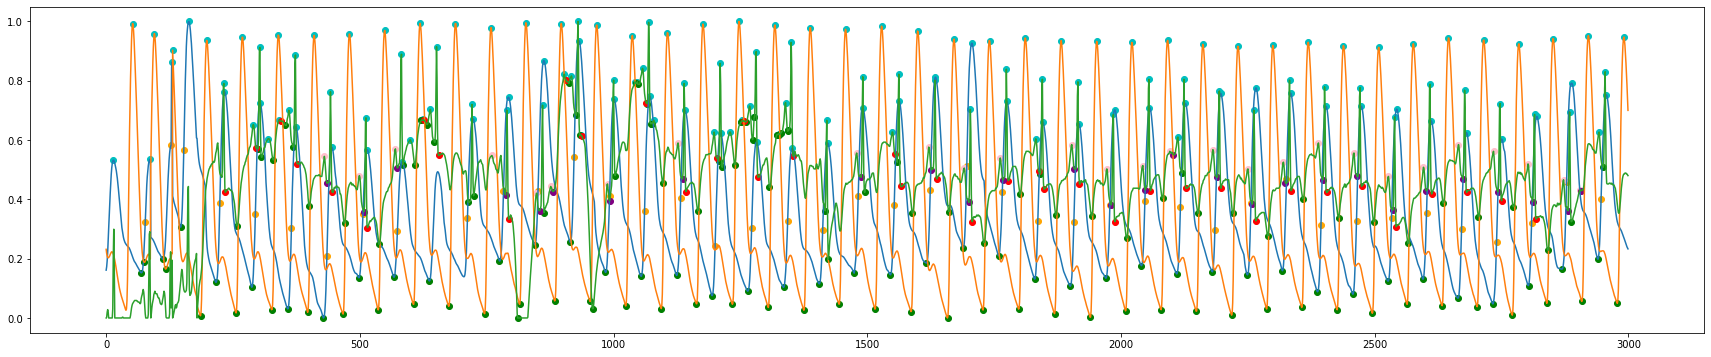

In [15]:
## move bp to align the wave
import random
for i in range(len(p_peak_index)-1):
    ppg_segement_in_ppeaks = ppg_signal[p_peak_index[i]:p_peak_index[i+1]]
    ppg_max_index_list = []
    bp_segement_in_ppeaks = bp_signal[p_peak_index[i]:p_peak_index[i+1]]
    sbp_index_list = []

    for ppg_index in ppg_max_index:
        if ppg_index < p_peak_index[i+1]:
            if ppg_index >p_peak_index[i]:
                ppg_max_index_list.append(ppg_index)
    for bp_index in sbp_index:
        if bp_index < p_peak_index[i+1]:
            if bp_index >p_peak_index[i]:
                sbp_index_list.append(bp_index)    
    #print(f'max ppg len: {len(ppg_max_index_list)}') 
    #print(f'sbp len: {len(sbp_index_list)}') 

    if len(ppg_max_index_list) == 1 and len(sbp_index_list) == 1:
        if sbp_index_list[0] >= ppg_max_index_list[0]:
            bp_signal_aligned_to_ppg = bp_signal[(sbp_index_list[0] - ppg_max_index_list[0]):]
            
        else:
            bp_random = [random.randint(0,1) for _ in range(abs(sbp_index_list[0] - ppg_max_index_list[0]))]
            bp_signal_aligned_to_ppg = bp_random + bp_signal
        break
fig = plt.figure(figsize =(30,6))
plt.plot(ppg_signal)
plt.plot(bp_signal_aligned_to_ppg)
plt.plot(ecg_signal)
plt.show()
fig = plt.figure(figsize=(30,6))

plt.plot(ppg_signal)
plt.scatter(ppg_max_slopes_index, ppg_signal[ppg_max_slopes_index], color='orange', marker='o')
plt.scatter(ppg_max_index, ppg_signal[ppg_max_index], color='c', marker='o')
plt.scatter(ppg_min_index, ppg_signal[ppg_min_index], color='green', marker='o')
plt.scatter(sbp_index, bp_signal[sbp_index], color='c', marker='o')
plt.scatter(dbp_index, bp_signal[dbp_index], color='green', marker='o')
plt.plot(bp_signal)
plt.plot(ecg_signal)
plt.scatter(r_peak_index, ecg_signal[r_peak_index], color='c', marker='o')
plt.scatter(ecg_min_index, ecg_signal[ecg_min_index], color='green', marker='o')
plt.scatter(s_peak_index, ecg_signal[s_peak_index], color='red', marker='o')
plt.scatter(p_peak_index, ecg_signal[p_peak_index], color='pink', marker='o')
plt.scatter(q_peak_index, ecg_signal[q_peak_index], color='purple', marker='o')
plt.show()

In [44]:
ppg_aligned = []
bp_aligned = []
ecg_aligned = []
'''for i in range(len(p_peak_index[:-1])):
    ppg_segement = ppg_signal[p_peak_index[i]:p_peak_index[i+1]]
    bp_segement = bp_signal_aligned_to_ppg[p_peak_index[i]:p_peak_index[i+1]]
    ecg_segement = ecg_signal[p_peak_index[i]:p_peak_index[i+1]]'''
ppg_max_index_aligned = []

begin_index = 1
window_index = 5
for p_index_one, p_index_two in zip(p_peak_index[:-1], p_peak_index[1:]):
    index_list = list(range(p_index_one, p_index_two))
    # print(index_list)
    for i in range(begin_index, (begin_index + window_index)):
        if ppg_max_index[i] in index_list:
            if ppg_max_index[i-1] not in 


            begin_index = ppg_max_index.index(i)



[430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498]


In [16]:
jywlist = list(range(10,15))
print(jywlist)
for i in range(len(jywlist)):
    jywlist[i] = jywlist[i] + 5
print(jywlist)
a = 13
b = 1
if a in jywlist:
    print(a, jywlist.index(a))
if b not in jywlist:
    print('not')

[10, 11, 12, 13, 14]
[15, 16, 17, 18, 19]
not


In [ ]:
# get all patient dataset
patients = [0, 1, 2, 3, 4, 6, 14, 15, 16, 18, 24, 35, 36, 37, 39, 40, 41, 46, 64, 66, 67, 73, 79, 80, 81, 82, 86, 87, 88, 89, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 108, 109, 110, 111, 115, 116, 117, 118, 120, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 141, 144, 149, 150, 151, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 182, 184, 186, 188, 189, 192, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 247, 248, 249, 251, 252, 253, 254, 255, 256, 257, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 272, 273, 277, 278, 279, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 295, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 309, 310, 311, 313, 314, 315, 316, 317, 318, 319, 320, 321, 323, 324, 327, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 377, 380, 391, 393, 394, 395, 397, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 413, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 429, 430, 431, 432, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 459, 460, 462, 463, 464, 465, 466, 470, 471, 472, 475, 480, 481, 482, 483, 484, 486, 487, 488, 490, 491, 492, 496, 497, 498, 499, 500, 502, 503, 504, 505, 507, 508, 509, 510, 512, 514, 515, 516, 520, 524, 527, 528, 529, 530, 531, 532, 533, 535, 537, 538, 539, 543, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 564, 565, 570, 576, 577, 578, 582, 590, 592, 593, 597, 599, 600, 602, 603, 604, 606, 607, 609, 612, 625, 626, 627, 628, 629, 630, 633, 634, 635, 639, 640, 641, 644, 646, 648, 653, 655, 656, 657, 658, 662, 670, 673, 674, 676, 677, 681, 682, 683, 685, 686, 687, 688, 689, 692, 693, 695, 696, 697, 698, 700, 703, 704, 705, 706, 707, 708, 709, 711, 712, 717, 719, 720, 721, 722, 723, 724, 725, 727, 729, 730, 731, 733, 734, 735, 736, 737, 741, 743, 744, 748, 749, 753, 754, 755, 756, 759, 774, 775, 776, 777, 780, 781, 783, 784, 785, 786, 787, 790, 791, 792, 794, 799, 800, 801, 802, 803, 805, 807, 808, 809, 810, 813, 820, 821, 822, 823, 828, 829, 830, 843, 845, 847, 868, 869, 922, 923, 947, 948, 949, 951, 952, 957, 959, 960, 962, 972, 975, 981, 989]
sbp500 = []
dbp500 = []
sbp_ori500 = []
dbp_ori500 = []
features500 = []
for patient in patients[:3]:
    patient_data = data['p'][0,patient]
    if len(patient_data[0]) >= 25000:
        ppg_ori = patient_data[0]
        bp_ori = patient_data[1]
        ecg_ori = patient_data[2]
        ecg_detrened = straighten_ecg(ecg_ori)
        ppg_normalized = normalize_sinal(ppg_ori)
        bp_standarded = bp_ori / bp_standard_rate
        ecg_normalized = normalize_sinal(ecg_detrened)
        ppg_segmented, bp_segmented, bp_ori_segmented, ecg_segmented = align_ppgbp_segment(ppg_signal = ppg_normalized, bp_signal1 = bp_standarded, bp_signal2 = bp_ori, ecg_signal = ecg_normalized, show=0)
        bps_features = get_feautres(ppg_segmented, bp_segmented, bp_ori_segmented, ecg_segmented)
        sbp = np.array(bps_features[0])
        dbp = np.array(bps_features[1])
        sbp_ori = np.array(bps_features[2])
        dbp_ori = np.array(bps_features[3])
        features = np.array(bps_features[4:])
        sbp500.append(sbp)
        dbp500.append(dbp)
        sbp_ori500.append(sbp_ori)
        dbp_ori500.append(dbp_ori)
        features500.append(features)
        #print(patient)
#len(sbp_ori500)    

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
patient_data0 = data['p'][0,0][:,:3000]
bp0 = patient_data0[1]
patient_data1 = data['p'][0,1][:,:3000]
bp1 = patient_data1[1]
mse = mean_squared_error(bp0, bp1)
rmse = np.sqrt(mse)
print(rmse)
plt.plot(bp0)
plt.plot(bp1)
plt.show()